<a rel="license" href="https://faculdadesalvadorarena.org.br/"><img alt="FESA" style="border-width:0" src="https://faculdadesalvadorarena.org.br/wp-content/uploads/2022/07/logo_fesa.png" /></a><br />
**FESA - Eletiva II (2025.1)** <br/>

Aluno(a): Vitoria Kaori Kuriyama <br/>
Data: 10/03/2025 <br/>

In [200]:
# Importação de bibliotecas para análise de dados e visualização no Python.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
# Personaliza a aparência dos gráficos, ajustando o tamanho das fontes,
# dimensões de figuras e outros elementos visuais.
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## 1. Explorando o Dataset

O dataset utilizado, MovieLens (small), possui informações detalhadas sobre filmes, incluindo avaliações de usuários, gêneros, rótulos e links para bancos de dados como o IMDb e o TMDB.

🔗 O conjunto de dados pode ser acessado em: https://grouplens.org/datasets/movielens/

### 1.1. Importando o Dataset

In [202]:
# Importa o dataset links.csv
dfLinks = pd.read_csv('/content/links.csv')

In [203]:
# Importa o dataset movies.csv
dfMovies = pd.read_csv('/content/movies.csv')

In [204]:
# Importa o dataset ratings.csv
dfRatings = pd.read_csv('/content/ratings.csv')

In [205]:
# Importa o dataset tags.csv
dfTags = pd.read_csv('/content/tags.csv')

### 1.2. Informações básicas do dataset

### 1.2.1 Links

In [206]:
# Exibe as primeiras 5 linhas do Dataset
dfLinks.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [207]:
# Exibe o número de linhas e colunas do Dataset
print(f'O dataset possui {dfLinks.shape[0]} exemplos/amostras/linhas e {dfLinks.shape[1]} atributos/variáveis/colunas.')

O dataset possui 9742 exemplos/amostras/linhas e 3 atributos/variáveis/colunas.


In [208]:
# Exibe um resumo das informações do Dataset
dfLinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [209]:
# Verifica se há valores nulos
print(dfLinks.isnull().sum())

movieId    0
imdbId     0
tmdbId     8
dtype: int64


### 1.2.2 Movies

In [210]:
# Exibe as primeiras 5 linhas do Dataset
dfMovies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [211]:
# Exibe o número de linhas e colunas do Dataset
print(f'O dataset possui {dfMovies.shape[0]} exemplos/amostras/linhas e {dfMovies.shape[1]} atributos/variáveis/colunas.')

O dataset possui 9742 exemplos/amostras/linhas e 3 atributos/variáveis/colunas.


In [212]:
# Exibe um resumo das informações do Dataset
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [213]:
# Verifica se há valores nulos
print(dfMovies.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64


### 1.2.3 Ratings

In [214]:
# Exibe as primeiras 5 linhas do Dataset
dfRatings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [215]:
# Exibe o número de linhas e colunas do Dataset
print(f'O dataset possui {dfRatings.shape[0]} exemplos/amostras/linhas e {dfRatings.shape[1]} atributos/variáveis/colunas.')

O dataset possui 100836 exemplos/amostras/linhas e 4 atributos/variáveis/colunas.


In [216]:
# Exibe um resumo das informações do Dataset
dfRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [217]:
# Verifica se há valores nulos
print(dfRatings.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


### 1.2.4 Tags

In [218]:
# Exibe as primeiras 5 linhas do Dataset
dfTags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [219]:
# Exibe o número de linhas e colunas do Dataset
print(f'O dataset possui {dfTags.shape[0]} exemplos/amostras/linhas e {dfTags.shape[1]} atributos/variáveis/colunas.')

O dataset possui 3683 exemplos/amostras/linhas e 4 atributos/variáveis/colunas.


In [220]:
# Exibe um resumo das informações do Dataset
dfTags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [221]:
# Verifica se há valores nulos
print(dfTags.isnull().sum())

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


## 2. Correção e Verificação dos Dados

### Problemas identificados no dataset

**Nomes das colunas:**
* São compreensíveis apenas para aqueles que entendem inglês.

**Tipos de dados:**
* O "timestamp" nos arquivos ratings.csv e tags.csv está em formato UNIX, necessitando de uma conversão para torná-lo mais legível.

* O "tmdbId" no links.csv usa valores float, sendo que seria mais apropriado valores inteiros.

**Dados ausentes:**
* O "tmdbId" no links.csv possui valores ausentes.

**Falta de organização:**
* "genres" em movies.csv está no formato de string e está separado por "|", logo, se transformado em uma lista, facilitaria a análise e visualizações de dados.

**Verificação de outliers:**
* Alguns dados podem ser discrepantes.

### 2.1 Links

In [222]:
# Muda os nomes das colunas
dfLinks.columns = ['ID do Filme', 'ID do IMDb', 'ID do TMDB']

In [223]:
# Verifica a atualização dos nomes
dfLinks.head()

,ID do Filme,ID do IMDb,ID do TMDB
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [224]:
# Converte tmdbId para inteiro, excluindo valores ausentes
dfLinks['ID do TMDB'] = dfLinks['ID do TMDB'].fillna(0).astype(int)

In [225]:
# Verifica a conversão
dfLinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID do Filme  9742 non-null   int64
 1   ID do IMDb   9742 non-null   int64
 2   ID do TMDB   9742 non-null   int64
dtypes: int64(3)
memory usage: 228.5 KB


In [226]:
# Verifica se ainda há valores ausentes
print(dfLinks.isnull().sum())

ID do Filme    0
ID do IMDb     0
ID do TMDB     0
dtype: int64


### 2.2 Movies

In [227]:
# Muda os nomes das colunas
dfMovies.columns = ['ID do Filme', 'Título', 'Gêneros']

In [228]:
# Transforma "Gêneros" em uma lista e o "|" em vírgulas
dfMovies['Gêneros'] = dfMovies['Gêneros'].str.split('|')

In [229]:
# Verifica as atualizações
dfMovies.head()

,ID do Filme,Título,Gêneros
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


### 2.3 Ratings

In [230]:
# Muda os nomes das colunas
dfRatings.columns = ['ID do Usuário', 'ID do Filme', 'Avaliação', 'Data e Hora']

In [231]:
# Converte timestamp para um formato de data mais legível
dfRatings['Data e Hora'] = pd.to_datetime(dfRatings['Data e Hora'], unit='s')

In [232]:
# Verifica as atualizações
dfRatings.head()

,ID do Usuário,ID do Filme,Avaliação,Data e Hora
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


Text(0, 0.5, 'Avaliação')

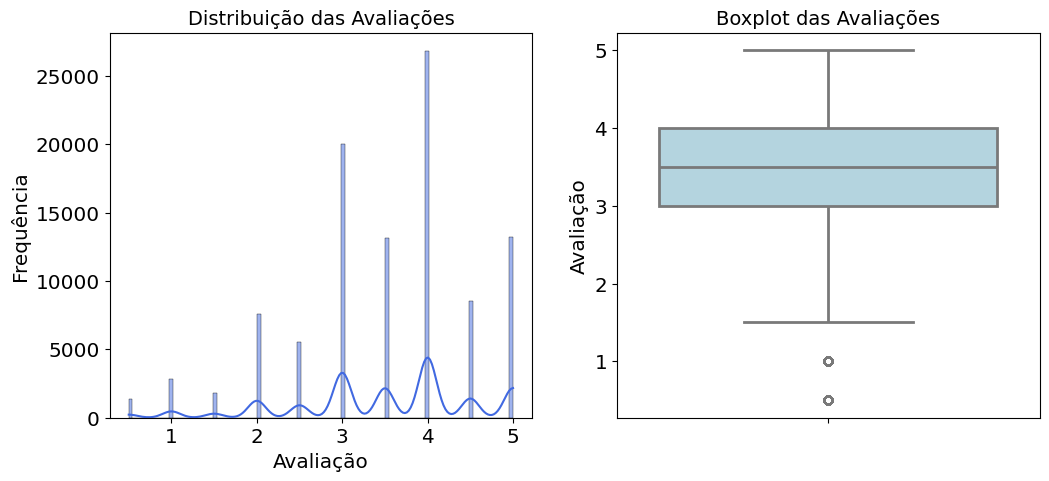

In [233]:
# Verifica se há outiliers por meio de gráficos

# Cria a figura e os eixos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma das avaliações
sns.histplot(data=dfRatings, x='Avaliação', kde=True, ax=axes[0], color="royalblue")
axes[0].set_title('Distribuição das Avaliações', fontsize=14)
axes[0].set_xlabel('Avaliação')
axes[0].set_ylabel('Frequência')

# Boxplot das avaliações
sns.boxplot(data=dfRatings, y='Avaliação', ax=axes[1], color="lightblue", linewidth=2)
axes[1].set_title('Boxplot das Avaliações', fontsize=14)
axes[1].set_ylabel('Avaliação')

**Conclusão**: Pode-se observar que, por mais que haja valores discrepantes, são dados válidos, logo não há a necessidade de removê-los ou mudá-los.

In [234]:
# Verifica se há avaliações feitas antes da criação do MovieLens
dfRatings['Data e Hora'].min(), dfRatings['Data e Hora'].max()

(Timestamp('1996-03-29 18:36:55'), Timestamp('2018-09-24 14:27:30'))

**Conclusão**: Por mais que o site tenha sido criado em 1997, ao pesquisarmos, podemos perceber que antes do MovieLens ser criado, a empresa responsável havia feito um precursor dele, o Net Perceptions.

Logo, esses dados podem ter sido "levados" para o site MovieLens ou podem ser apenas testes feitos antes de seu lançamento, não havendo então, a necessidade de remover ou mudar esses dados.

### 2.4 Tags

In [235]:
# Muda os nomes das colunas
dfTags.columns = ['ID do Usuário', 'ID do Filme', 'Rótulo', 'Data e Hora']

In [236]:
# Converte timestamp para um formato de data mais legível
dfTags['Data e Hora'] = pd.to_datetime(dfTags['Data e Hora'], unit='s')

In [237]:
# Verifica as atualizações
dfTags.head()

,ID do Usuário,ID do Filme,Rótulo,Data e Hora
0,2,60756,funny,2015-10-24 19:29:54
1,2,60756,Highly quotable,2015-10-24 19:29:56
2,2,60756,will ferrell,2015-10-24 19:29:52
3,2,89774,Boxing story,2015-10-24 19:33:27
4,2,89774,MMA,2015-10-24 19:33:20
